In [1]:
from scipy.special import erfinv
from scipy.special import loggamma
from scipy.stats import gamma
from scipy.stats import nbinom
from scipy import special
import numpy as np
import sys
import math
sys.path.insert(1,'../numerics_snakemake')
sys.path.insert(1,'..')
from plot_sfs import *
from matplotlib import pyplot as plt
from power_v2 import *
from plot_expseg import *
import seaborn as sns
from scipy.stats import lognorm
from scipy.stats import norm
import pandas as pd

In [2]:
colors = sns.color_palette("colorblind", 8)
plt.rcParams.update({'font.size': 24})
plt.rcParams.update({'font.family': 'sans-serif'})
plt.rcParams.update({'font.sans-serif': 'Helvetica'})
plt.rcParams.update({'figure.figsize': '10,8'})
plt.rcParams.update({'lines.linewidth': 6})
plt.rcParams.update({'lines.markersize': 12})

In [3]:
# load data
data = pd.read_csv("../numerics_snakemake/spatial_integrals_dim2.csv")
data_pr = pd.read_csv("../numerics_snakemake/cleaned_data_dim2_errorFalse.csv")
data_pr = data_pr.loc[data_pr['poly_type'] == '1_1']

sigma_vals = data['sigma'].tolist()
kappa_list = data['u2_GQ'].tolist()
res_vals = data_pr['residues']
pole_vals = data_pr['poles']

## Graphical model from Simons et al. paper

![](model.png)

### Implementation

In [4]:
def zscore_montecarlo_loop(h2,L,sigma_vals,pole_vals,res_vals,sigma_list,N=1000,D=1,d=2,mu=1e-8,n=1e8,fs_mean=-4,
                           fs_sd=1,size=1000,thresh=5.45,fofs_filename="fofs.txt"):
    fofs = pd.read_table(fofs_filename,header=None)
    pow_list = np.zeros(len(sigma_list))
    pow_all = []
    # for each value of sigma
    for j in range(len(sigma_list)):
        
        # sample values of s
        samples = np.random.choice(a=fofs.iloc[:,0],p=fofs.iloc[:,1]/sum(fofs.iloc[:,1]),size=size)
        s_samples = [10**x for x in samples]
        
        # store z's
        z_arr = np.zeros(size)
        
        # for each sampled s
        for i in range(size):
            # compute sfs params for each s value
            rate = rate_p(sigma_list[j],s_samples[i],sigma_vals,pole_vals,N=N,D=D,d=d)
            shape = shape_p(sigma_list[j],s_samples[i],sigma_vals,res_vals,mu=mu,N=N,D=D,d=d)

            # sample q from sfs
            r = shape
            p = rate/(rate+n)
            q = min(np.random.negative_binomial(r, p, 1)/n,1)
            
            # sample b
            sd = (h2/L)*(1/(4*mu))*s_samples[i]
            b=np.random.normal(0,sd,1)

            # get probability z score > thresh
            mean = b*np.sqrt(n*q*(1-q))
            z = norm.sf(thresh, loc=mean, scale=1)
            z_arr[i]=np.abs(z)

        pow_list[j]=np.mean(z_arr)
#         pow_all.append(z_arr)
         
    return pow_list


In [5]:
sl = np.logspace(-1,2,30)
reps = 10000
target = 1e7

Text(0.5, 0, '$\\sigma$')

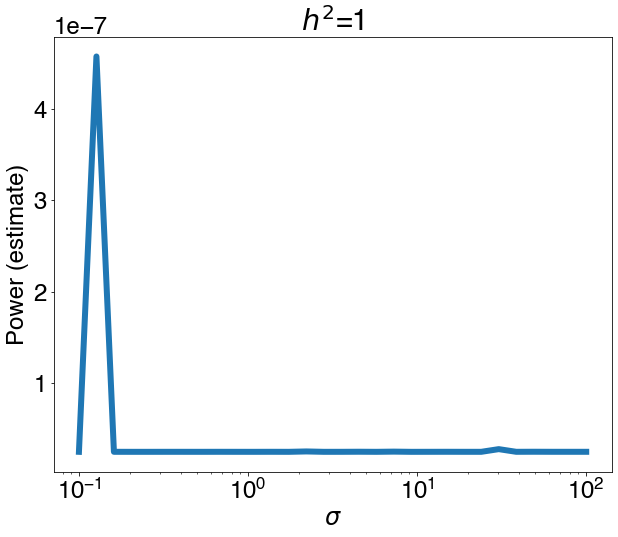

In [6]:

h2=1
power_vals = zscore_montecarlo_loop(h2=h2,L=target,sigma_vals=sigma_vals,pole_vals=pole_vals,
                                    res_vals=res_vals,sigma_list=sl,size=reps,n=1e6)
plt.plot(sl,power_vals)
plt.xscale("log")
plt.title(r"$h^2$="+str(h2))
plt.ylabel("Power (estimate)")
plt.xlabel(r"$\sigma$")

Text(0.5, 0, '$\\sigma$')

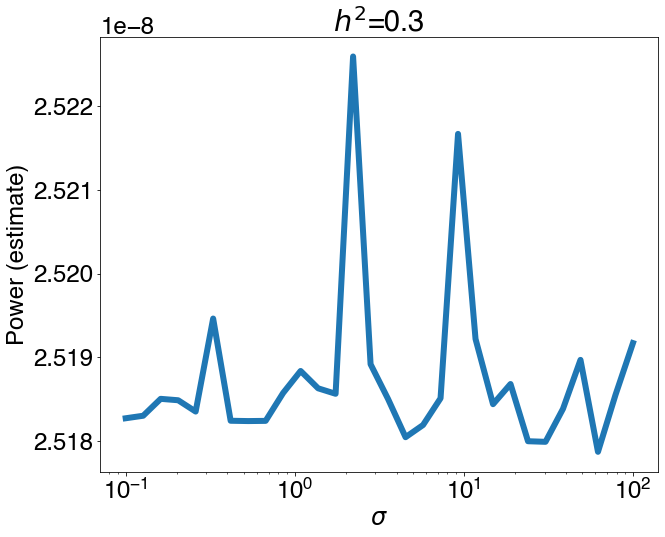

In [7]:

h2=0.3
power_vals = zscore_montecarlo_loop(h2=h2,L=target,sigma_vals=sigma_vals,pole_vals=pole_vals,
                                    res_vals=res_vals,sigma_list=sl,size=reps,n=1e6)
plt.plot(sl,power_vals)
plt.xscale("log")
plt.title(r"$h^2$="+str(h2))
plt.ylabel("Power (estimate)")
plt.xlabel(r"$\sigma$")

Text(0.5, 0, '$\\sigma$')

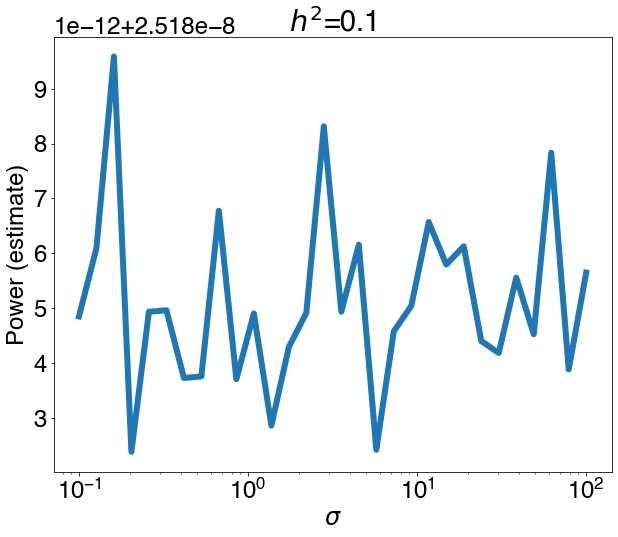

In [8]:

h2=0.1
power_vals = zscore_montecarlo_loop(h2=h2,L=target,sigma_vals=sigma_vals,pole_vals=pole_vals,
                                    res_vals=res_vals,sigma_list=sl,size=reps,n=1e6)
plt.plot(sl,power_vals)
plt.xscale("log")
plt.title(r"$h^2$="+str(h2))
plt.ylabel("Power (estimate)")
plt.xlabel(r"$\sigma$")